In [3]:
isMaster = True
from app.dotenv import base_dir, data_dir
from app.load_data import *
from app.change_detect.opticalflow import *
from app.object_detection.cropROI import *




video_fname = 'vtest.avi'
save_path = f'{data_dir}\{video_fname.split(".")[0]}'
print(f'images path: {save_path}')


images path: c:\Users\yili0901\Downloads\code\identify_static_video_changes\data\vtest


load yolo model

In [5]:
from app.object_detection.yolo import saveYOLOv5Model, saveYOLOv8Model
from app.object_detection.yolo import loadYOLOv8Model 
from app.object_detection.yolo import inferenceYOLOv8Model,plotClassifcation


# saveYOLOv5Model(data_dir)
saveYOLOv8Model(data_dir)
model = loadYOLOv8Model(data_dir)

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\yili0901\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:04<00:00, 5.00MB/s]


Model weights saved to c:\Users\yili0901\Downloads\code\identify_static_video_changes\data/yolov8s_weights.pt
Model YOLO V8 weights loaded successfully


#### parse images from video

In [6]:

from app.load_data import *

if not (os.path.exists(save_path) and len(os.listdir(save_path)) > 0):
    saveVideoFrames(video_path = f"{data_dir}/{video_fname}",save_path = save_path)
num_frames = len(os.listdir(save_path))

795 Frames from video c:\Users\yili0901\Downloads\code\identify_static_video_changes\data/vtest.avi
Frames saved in c:\Users\yili0901\Downloads\code\identify_static_video_changes\data\vtest


In [7]:
# # import cv2 as cv
# # import os

# # def playFrames(save_path = '', frame_rate=30,extension='.png'):
# #     # Get list of saved frames (sorted by filename)
# #     frames_list = [f for f in os.listdir(save_path) if f.endswith(extension)]
# #     frames_list.sort(key=lambda x: int(x.split('.')[0]))  # Sort by numerical order
    
# #     # Play each frame
# #     for frame_fname in frames_list:
# #         # Read the frame
# #         frame = cv.imread(os.path.join(save_path, frame_fname))
        
# #         # Show the frame
# #         cv.imshow('Video Playback', frame)
        
# #         # Wait for a specific amount of time (in milliseconds), 
# #         # the frame rate determines the time between frames
# #         if cv.waitKey(1000 // frame_rate) & 0xFF == ord('q'):  # 'q' to quit
# #             break
    
# #     # Release the video window
# #     cv.destroyAllWindows()
# # playFrames(save_path = save_path, frame_rate=30)

# import cv2 as cv
# import os
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# def playFrames(save_path, frame_rate=30):
#     # Get list of saved frames (sorted by filename)
#     frames = [f for f in os.listdir(save_path) if f.endswith('.png')]
#     frames.sort(key=lambda x: int(x.split('.')[0]))  # Sort by numerical order
    
#     # Create a plot figure
#     fig, ax = plt.subplots()

#     # Set up the first frame to display
#     img = cv.imread(os.path.join(save_path, frames[0]))
#     img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB for display with matplotlib

#     # Show the first frame
#     imshow = ax.imshow(img_rgb)
#     plt.axis('off')  # Turn off axis

#     # Function to update the plot with the next frame
#     def update_frame(i):
#         img = cv.imread(os.path.join(save_path, frames[i]))
#         img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
#         imshow.set_data(img_rgb)  # Update the image data
#         return [imshow]

#     # Create an animation
#     ani = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=1000 // frame_rate, blit=True)

#     plt.show()
# playFrames(save_path = save_path, frame_rate=30)

#### detect

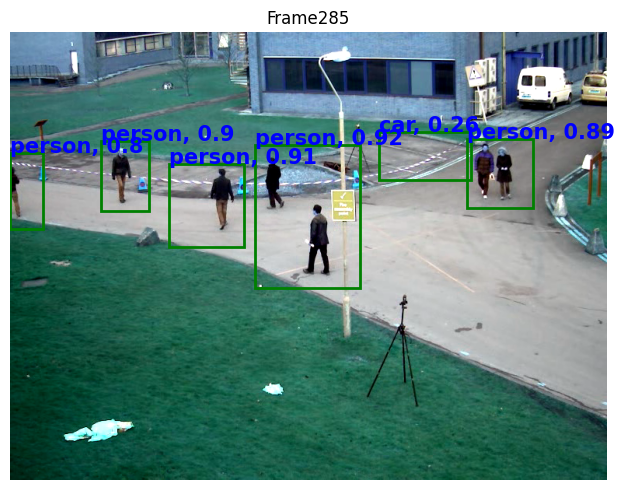

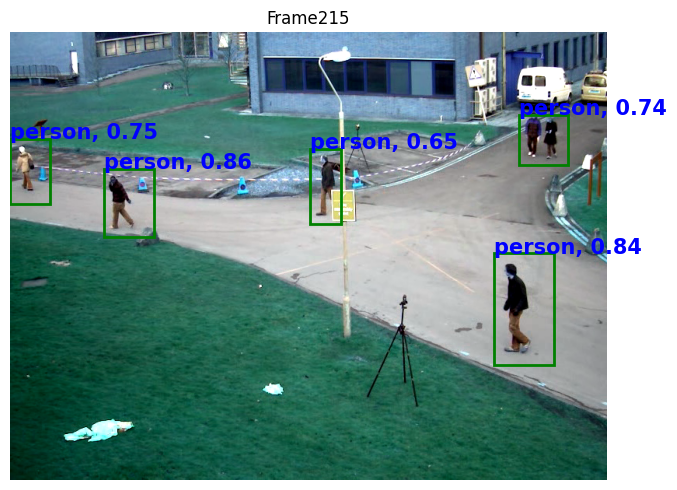

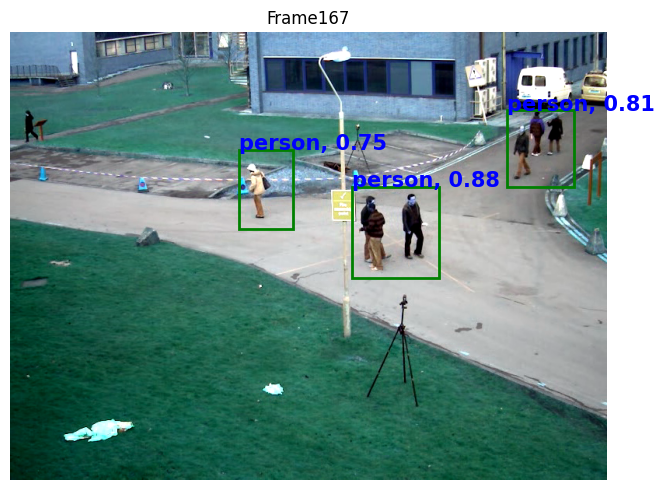

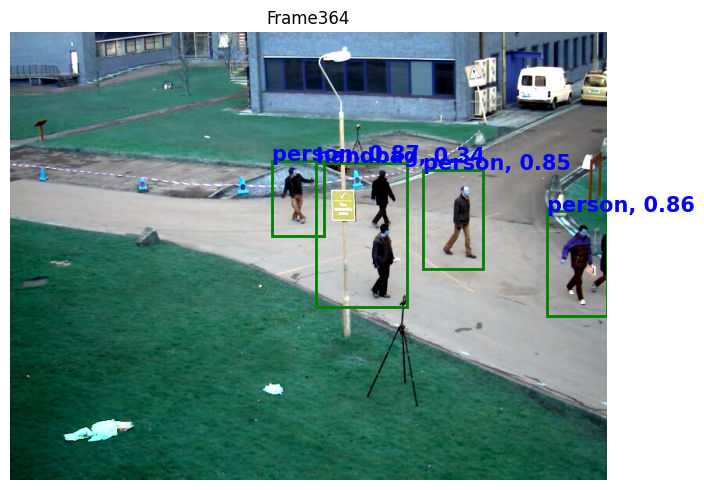

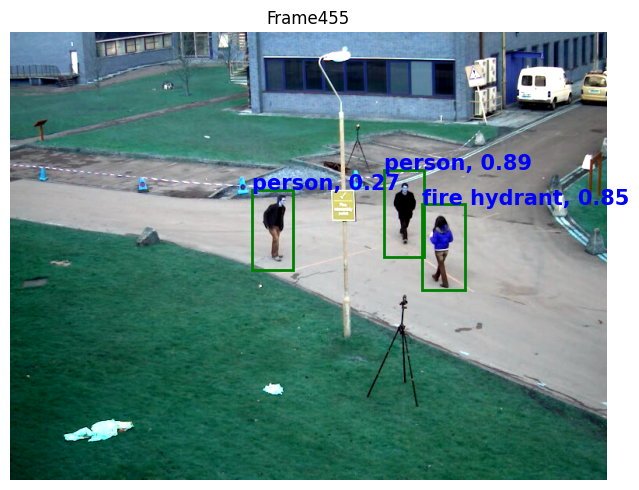

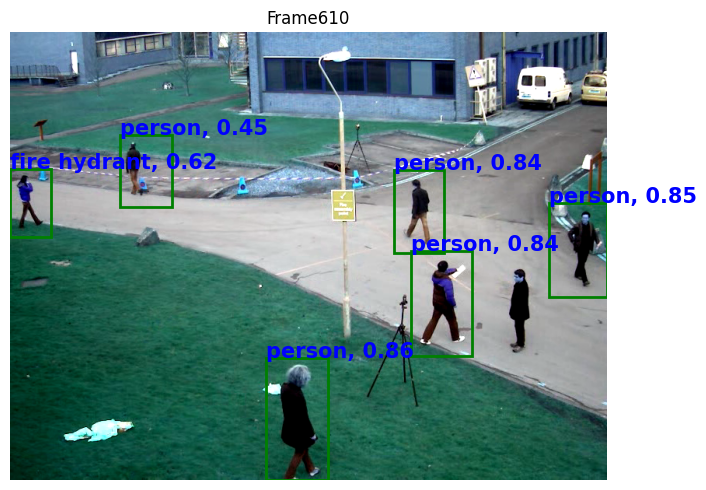

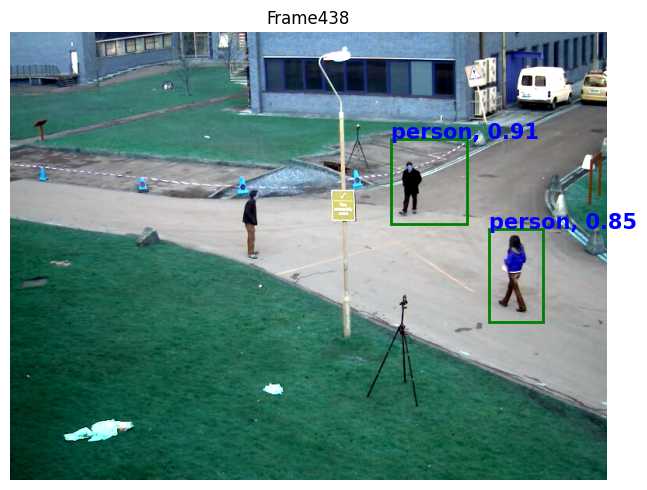

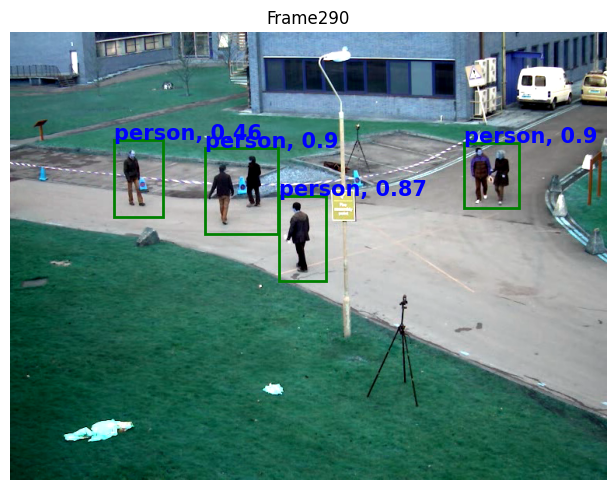

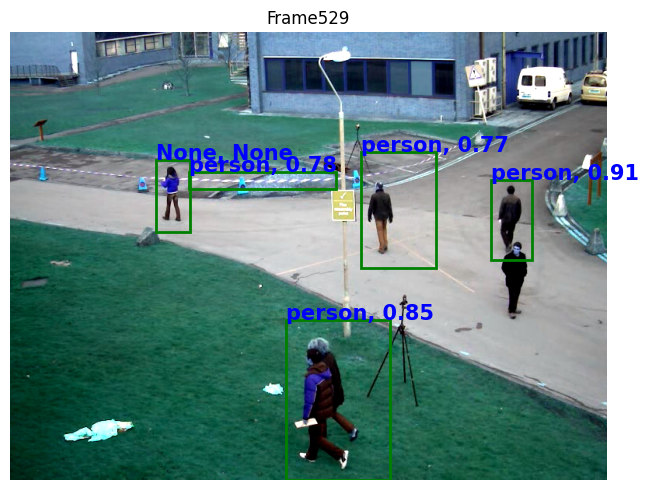

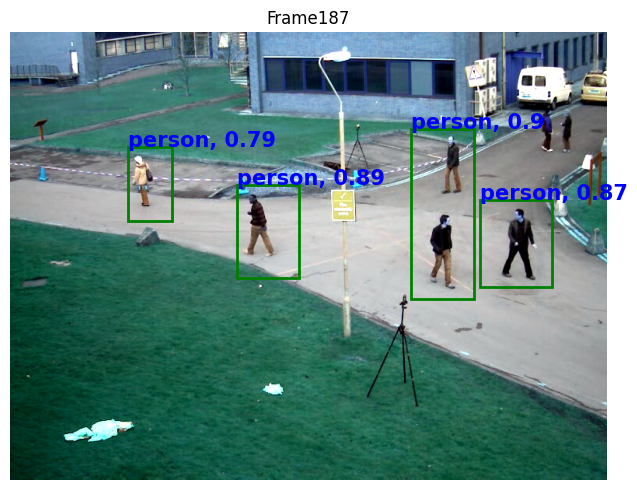

In [8]:
from random import sample
import cv2

for frame_num in sample(list(range(num_frames)), 10):
    next_rgb = loadFrame(save_path =f"{save_path}/{frame_num}.png")
    # run jupyter notebook using magic
    # print(frame_num)
    %run detecting_sudden_scene_change.ipynb
    # print(roi_detected)
    plotClassifcation(roi_coords, next_rgb,roi_detected,frame_num)
    
    # break
    # fig.canvas.draw()
    # img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    # img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))  # Convert to (H, W, 3)

    # # Convert RGB to BGR for OpenCV
    # img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # # Display the image using OpenCV
    # cv2.imshow("Figure", img_bgr)